# Importing Packages

In [33]:
import matplotlib.pyplot as plt
from networkx_viewer import Viewer
import matplotlib.colors as mcolors
from collections import defaultdict
import networkx as nx 

#from model import spcall

%matplotlib inline

In [34]:
def draw(G, measures, measure_name):
  #* https://stackoverflow.com/a/52013202
  #* https://aksakalli.github.io/2017/07/17/network-centrality-measures-and-their-visualization.html
  #* https://www.datacamp.com/community/tutorials/social-network-analysis-python

  #* Create two lists of edges based on their weight.
  #* 'elarge' contains edges with weight greater than 5.
  #* 'esmall' contains edges with weight less than or equal to 5.
  elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 5]
  esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 5]

  #* Generate a spring layout for the graph.
  pos = nx.spring_layout(G)

  #* Set the size of each node based on its corresponding measure value.
  node_size = [v * 1000 for v in measures.values()]

  #* Draw the nodes of the graph with their size and color determined by the measure values.
  #* The color map 'plt.cm.plasma' is used for coloring the nodes.
  nodes = nx.draw_networkx_nodes(G, pos, node_size=node_size, 
                                  cmap=plt.cm.plasma,
                                  node_color=list(measures.values()),
                                  nodelist=measures.keys())

  #* Set the color normalization of the nodes to be logarithmic.
  nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
  
  #* Draw the edges of the graph.
  edges = nx.draw_networkx_edges(G, pos)
  
  #* Draw the 'elarge' and 'esmall' edges with different styles.
  #* The 'elarge' edges are drawn with a width of 2.
  #* The 'esmall' edges are drawn with a width of 2, transparency of 0.5, blue color, and dashed style.
  nx.draw_networkx_edges(G, pos, edgelist=elarge, width=2)
  nx.draw_networkx_edges(G, pos, edgelist=esmall, width=2, alpha=0.5, edge_color='blue', style='dashed')

  #* Add labels to the nodes with a font size of 10, blue color, and sans-serif font family.
  nx.draw_networkx_labels(G, pos, font_size=10, font_color='blue', font_family='sans-serif')
  
  #* Set the title of the plot, add a color bar, turn off the axis, and display the plot.
  plt.title(measure_name)
  plt.colorbar(nodes)
  plt.axis('off')
  plt.show()


In [35]:
def plot_G(G, measures):
  #* Define two lists of edges based on their weight.
  #* 'elarge' contains edges with weight greater than 5.
  #* 'esmall' contains edges with weight less than or equal to 5.
  elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 5]
  esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 5]

  #* Generate a spring layout for the graph.
  #* This layout treats edges as springs holding nodes close, while treating nodes as repelling objects.
  pos = nx.spring_layout(G)
  
  #* Set the size of each node based on its corresponding measure value.
  #* The size is multiplied by 1000 for better visibility.
  node_size = [v * 1000 for v in measures.values()]

  #* Draw the nodes of the graph with their size and color determined by the measure values.
  #* The color map 'plt.cm.plasma' is used for coloring the nodes.
  nodes = nx.draw_networkx_nodes(G, pos, node_size=node_size,
                                cmap=plt.cm.plasma,
                                node_color=list(measures.values()),
                                nodelist=measures.keys())

  #* Set the color normalization of the nodes to be logarithmic.
  #* This can be useful if the measure values vary widely.
  nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))

  #* Draw the nodes of the graph again with a fixed size of 50 and a color map of 'plt.cm.plasma'.
  nx.draw_networkx_nodes(G, pos, node_size=50, cmap=plt.cm.plasma)

  #* Draw the 'elarge' and 'esmall' edges with different styles.
  #* The 'elarge' edges are drawn with a width of 2.
  #* The 'esmall' edges are drawn with a width of 2, transparency of 0.5, blue color, and dashed style.
  nx.draw_networkx_edges(G, pos, edgelist=elarge, width=2)
  nx.draw_networkx_edges(G, pos, edgelist=esmall, width=2, alpha=0.5, edge_color='blue', style='dashed')

  #* Add labels to the nodes with a font size of 10, black color, and sans-serif font family.
  nx.draw_networkx_labels(G ,pos, font_size=10, font_color='black', font_family='sans-serif')

  #* Turn off the axis and display the plot.
  plt.axis('off')
  plt.show()

In [36]:
def plot_Gp(G, measures):
  # Set the figure size to make the plot high-definition.
  plt.figure(figsize=(50, 50), dpi=300)

  #* Define two lists of edges based on their weight.
  #* 'elarge' contains edges with weight greater than 5.
  #* 'esmall' contains edges with weight less than or equal to 5.
  elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 5]
  esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 5]

  #* Generate a spring layout for the graph.
  #* This layout treats edges as springs holding nodes close, while treating nodes as repelling objects.
  pos = nx.spring_layout(G, iterations=13, scale=300, seed=1234)

  #* Set the size of each node based on its corresponding measure value.
  #* The size is multiplied by 1000 for better visibility.
  node_size = [v * 1000 for v in measures.values()]

  #* Draw the nodes of the graph with their size and color determined by the measure values.
  #* The color map 'plt.cm.plasma' is used for coloring the nodes.
  nodes = nx.draw_networkx_nodes(G, pos, node_size=node_size, cmap=plt.cm.plasma, 
                                  node_color=list(measures.values()),
                                  nodelist=measures.keys())

  #* Set the color normalization of the nodes to be logarithmic.
  #* This can be useful if the measure values vary widely.
  nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))

  #* Create a color map based on the node labels.
  #* Different labels are mapped to different colors. 
  # color_map = []
  # for node in G:
  #   if 'fac' in node:
  #       color_map.append('blue')
  #   elif 'stu' in node:
  #       color_map.append('green')
  #   elif 'adm' in node:
  #       color_map.append('yellow')
  #   elif 'sub' in node:
  #       color_map.append('orange')
  #   elif 'isp' in node:
  #       color_map.append('red')
  #   elif 'bis' in node:
  #       color_map.append('purple')
  #   elif 'par' in node:
  #       color_map.append('black')
  #   elif 'sup' in node:
  #       color_map.append('aqua')
  #   elif node in ['grade', 'assignment', 'Bulletin Board', 're-assign', 'enroll', 'register', 'transfer', 'drop']:
  #       color_map.append('gray')  # white for the specific nodes
  #   else:
  #       print (node)


  # Add the 'color' attribute to the nodes based on the node labels
  color_map = {}
  for node in G.nodes:
      node_str = str(node)
      if 'fac' in node_str:
          color_map[node] = 'blue'
      elif 'stu' in node_str:
          color_map[node] = 'green'
      elif 'adm' in node_str:
          color_map[node] = 'yellow'
      elif 'sub' in node_str:
          color_map[node] = 'orange'
      elif 'isp' in node_str:
          color_map[node] = 'red'
      elif 'bis' in node_str:
          color_map[node] = 'purple'
      elif 'par' in node_str:
          color_map[node] = 'black'
      elif 'sup' in node_str:
          color_map[node] = 'aqua'
      elif node_str in ['assignment', 'attendance', 'Bulletin Board', 'collaborate', 'enroll', 'event', 'grade', 're-assign', 'register', 'like', 'happy', 'surprise', 'sad','angry', 'room_', 'commented']:
          color_map[node] = 'gray'
      else:
          print(node_str)

  #* Draw the nodes of the graph again with a fixed size of 10 and a color map based on the node labels.
  nx.draw_networkx_nodes(G, pos, node_size=10, node_color=color_map, cmap=plt.cm.plasma)

  #* Draw the 'elarge' and 'esmall' edges with different styles.
  #* The 'elarge' edges are drawn with a width of 2 and gray color.
  #* The 'esmall' edges are drawn with a width of 2, transparency of 0.5, gray color, and dashed style.
  nx.draw_networkx_edges(G, pos, edgelist=elarge, edge_color='gray', width=1)
  nx.draw_networkx_edges(G, pos, edgelist=esmall, width=1, alpha=0.5, edge_color='gray', style='dashed')

  #* Add labels to the nodes with a font size of 10, gray color, and sans-serif font family.
  nx.draw_networkx_labels(G, pos, font_size=3, font_color='black', font_family='sans-serif')

  #* Turn off the axis and display the plot.
  plt.axis('off')

  #* Increase the DPI to 300 for a high-quality plot.
  plt.savefig("network.png", dpi=300)
  
  #* Display the plot 
  plt.show()


In [37]:
def plot_G2(G):
  #* Generate a spring layout for the graph.
  pos = nx.spring_layout(G)

  #* Draw the graph using NetworkX's built-in draw function.
  nx.draw_networkx(G)

  #* Add labels to the nodes with a font size of 10, gray color, and sans-serif font family.
  nx.draw_networkx_labels(G, pos, font_size=10, font_color='gray', font_family='sans-serif')

  #* Turn off the axis and display the plot.
  plt.axis('off')
  plt.show()

In [38]:
def writeandrender(filename, centrality):
  #* Extract the measure from the centrality dictionary.
  cmeasure = centrality["measure"]
  
  #* Sort the items in the measure dictionary in descending order based on their values.
  sorted_x = sorted(cmeasure.items(), key=lambda kv: kv[1], reverse=True)

  #* Check the 'overwrite' flag in the centrality dictionary.
  #* If it's True, open the file in write mode, which overwrites the existing content.
  #* If it's False, open the file in append mode, which adds to the existing content.
  if centrality["overwrite"]:
      f = open(filename + centrality["prefix"] + ".txt", 'w')
  else:
      f = open(filename + centrality["prefix"] + ".txt", 'a')
  
  #* Write the sorted items to the file.
  f.write(str(sorted_x))
  
  #* Close the file.
  f.close()

  #* Draw the weighted graph with the measure and the name from the centrality dictionary.
  draw(G, centrality["measure"], centrality["name"])

# Data Cleaning and Filter for the Month of November 2020

##### Removing the generic users from the dataset: "7505d64a54e061b7acd54ccd58b49dc43500b635"
##### Filtering for the whole month of November 2020

In [39]:
import pandas as pd

# Load the data into a pandas DataFrame
cs_dept_computer = 'C:/Users/IIT_C/OneDrive/Desktop/social_network_analysis/SNA_code/raw_data.csv'
mark_desktop = 'C:/Users/boyma/OneDrive/Desktop/learning_interactions/SNA_code/raw_data.csv' 
df = pd.read_csv(cs_dept_computer)

# Convert the 'ts' column to datetime
df['ts'] = pd.to_datetime(df['ts'])

# Define start and end date
start_date = '2020-11-01'
end_date = '2020-11-30'

# Filter rows based on date range
mask = (df['ts'] >= start_date) & (df['ts'] <= end_date)
df = df.loc[mask]

# Print the number of rows before removing
print(f"Number of rows before removing: {len(df)}")

# Remove rows where 'receiverid' is "7505d64a54e061b7acd54ccd58b49dc43500b635"
df = df[df['receiverid'] != "7505d64a54e061b7acd54ccd58b49dc43500b635"]

# Print the number of rows after removing
print(f"Number of rows after removing: {len(df)}")


Number of rows before removing: 12993
Number of rows after removing: 12425


### Export into CSV to check whether the date filtration is successful

In [40]:
# Export the DataFrame to a CSV file
df.to_csv('filtered_date_data.csv', index=False)

# Data Transformation 
- Transform the data from "reactions" column into their string equivalents in a new column called "emoji"
- Transform the data from "roomid" column into a new column called "room_name". For every new data, append the string "room_" to the beginning of the "roomid". For example, if the "roomid" is "a0dc6db1830d89519e8f", then the new column will be "room_a0dc6db". 
- Add a new column called "commented" where a string "commented" is added when the "commenter" column is not empty, otherwise, leave it as is. 



In [41]:
# Define a mapping from integers to emoji names
reaction_mapping = {
    1: 'like',
    2: 'happy',
    3: 'surprise',
    4: 'sad',
    5: 'angry'
}

# Create a new column 'emoji' by mapping the 'reaction' column to the corresponding emoji names
df['emoji'] = df['reaction'].map(reaction_mapping)

# Create a new column 'room_name' by appending 'room_' to the first 7 characters of the 'roomid' column
df['room_name'] = 'room_' + df['roomid'].str.slice(0, 10)

# Create a new column 'commented' where its data is derived from the 'commenter' column
df['commented'] = df['commenter'].apply(lambda x: 'commented' if pd.notnull(x) else '')


### Export to a new csv file to check whether the transformation is sucessful

In [42]:
# Write the DataFrame to a CSV file
df.to_csv('transformed_data.csv', index=False)


# Anonymize the users

In [43]:
import hashlib
import pandas as pd

def anonymize_id(id):
    if pd.isnull(id):
        return ''
    prefix = id[0]
    hash_object = hashlib.sha1(id.encode())
    hex_dig = hash_object.hexdigest()
    if prefix == 'A':
        return 'adm' + hex_dig[:5]
    elif prefix == 'F':
        return 'fac' + hex_dig[:5]
    elif prefix == 'S':
        return 'stu' + hex_dig[:5]
    elif prefix == 'P':
        return 'par' + hex_dig[:5]
    else:
        return 'unk' + hex_dig[:5]

# Create a dictionary to store the original IDs and their corresponding anonymized IDs
anonymized_ids = {}

# Get all unique IDs in the 'initiatorid', 'receiverid', 'reactor', and 'commenter' columns
unique_ids = pd.concat([df['initiatorid'], df['receiverid'], df['reactor'], df['commenter']]).dropna().unique()

# Create a mapping from the original IDs to the hashed IDs
for id in unique_ids:
    anonymized_ids[id] = anonymize_id(id)

# Replace the original IDs with the hashed IDs in the 'initiatorid', 'receiverid', 'reactor', and 'commenter' columns
for column in ['initiatorid', 'receiverid', 'reactor', 'commenter']:
    df[column] = df[column].map(anonymized_ids)


### Export to a new csv to check whether the anonymization is successful

In [44]:
# Write the DataFrame to a CSV file
df.to_csv('anon_data.csv', index=False)

## Mapping the Agent to Task Learning Interactions for the whole month of November 2020

In [45]:
import networkx as nx
import pandas as pd
import csv


# Create a directed graph
G = nx.DiGraph()

# Iterate over the rows of the dataframe
for index, row in df.iterrows():
    # Check if the IDs are not empty or null
    if pd.notnull(row['initiatorid']) and pd.notnull(row['receiverid']):
        # For Timeline Interactions
        if G.has_edge(row['initiatorid'], row['tltype']):
            G[row['initiatorid']][row['tltype']]['weight'] += 1
        else:
            G.add_edge(row['initiatorid'], row['tltype'], weight=1)
        
        if G.has_edge(row['tltype'], row['receiverid']):
            G[row['tltype']][row['receiverid']]['weight'] += 1
        else:
            G.add_edge(row['tltype'], row['receiverid'], weight=1)

    # For Reactions
    if pd.notnull(row['reactor']):
        if row['reactor'] == row['initiatorid']:
            # Add edges from reactor to reaction and from reaction to receiver
            if G.has_edge(row['reactor'], row['emoji']):
                G[row['reactor']][row['emoji']]['weight'] += 1
            else:
                G.add_edge(row['reactor'], row['emoji'], weight=1)
            
            if G.has_edge(row['emoji'], row['receiverid']):
                G[row['emoji']][row['receiverid']]['weight'] += 1
            else:
                G.add_edge(row['emoji'], row['receiverid'], weight=1)
        elif row['reactor'] == row['receiverid']:
            # Add edges from reactor to reaction and from reaction to initiator
            if G.has_edge(row['reactor'], row['emoji']):
                G[row['reactor']][row['emoji']]['weight'] += 1
            else:
                G.add_edge(row['reactor'], row['emoji'], weight=1)
            
            if G.has_edge(row['emoji'], row['initiatorid']):
                G[row['emoji']][row['initiatorid']]['weight'] += 1
            else:
                G.add_edge(row['emoji'], row['initiatorid'], weight=1)

    # For Comments
    if pd.notnull(row['commenter']):
        if G.has_edge(row['commenter'], row['commented']):
            G[row['commenter']][row['commented']]['weight'] += 1
        else:
            G.add_edge(row['commenter'], row['commented'], weight=1)
        
        if G.has_edge(row['commented'], row['initiatorid']):
            G[row['commented']][row['initiatorid']]['weight'] += 1
        else:
            G.add_edge(row['commented'], row['initiatorid'], weight=1)

    # For OnlineClass
    if pd.notnull(row['initiatorid']) and pd.notnull(row['room_name']):
        if G.has_edge(row['initiatorid'], row['room_name']):
            G[row['initiatorid']][row['room_name']]['weight'] += 1
        else:
            G.add_edge(row['initiatorid'], row['room_name'], weight=1)

# Add the 'color' attribute to the nodes based on the node labels
color_map = {}
for node in G.nodes:
    node_str = str(node)
    if 'fac' in node_str:
        color_map[node] = 'blue'
    elif 'stu' in node_str:
        color_map[node] = 'green'
    elif 'adm' in node_str:
        color_map[node] = 'yellow'
    elif 'sub' in node_str:
        color_map[node] = 'orange'
    elif 'isp' in node_str:
        color_map[node] = 'red'
    elif 'bis' in node_str:
        color_map[node] = 'purple'
    elif 'par' in node_str:
        color_map[node] = 'black'
    elif 'sup' in node_str:
        color_map[node] = 'aqua'
    elif 'room_' in node_str:
        color_map[node] = 'brown'
    elif 'commented' in node_str:
        color_map[node] = 'cyan'
    elif node_str in ['like', 'happy', 'surprise', 'sad', 'angry']:
        color_map[node] = 'pink'
    elif node_str in ['assignment', 'attendance', 'Bulletin Board', 'collaborate', 'enroll', 'event', 'grade', 're-assign', 'register']:
        color_map[node] = 'gray'
    else:
        print(node_str)

nx.set_node_attributes(G, color_map, 'color')


nan


### Count the Edge Weights

In [46]:
# Function to check edge attributes in a table format
def edges_to_dataframe(G):
    edge_data = []
    for u, v, data in G.edges(data=True):
        edge_data.append({
            'Source': u,
            'Target': v,
            'Weight': data.get('weight', 1),
            'Color': G.nodes[u].get('color', 'unknown') + '-' + G.nodes[v].get('color', 'unknown')
        })
    return pd.DataFrame(edge_data)

# Convert edges to DataFrame
edges_df = edges_to_dataframe(G)

# Display the DataFrame
print(edges_df)

        Source           Target  Weight        Color
0     fac57974           enroll      37    blue-gray
1       enroll         stu6bf30       1   gray-green
2       enroll         stu09170       1   gray-green
3       enroll         stuedd22       1   gray-green
4       enroll         stua6737       1   gray-green
...        ...              ...     ...          ...
3022  stuabb75  room_bbc5def6ee       1  green-brown
3023  stu0ced5  room_c7b41e1702       1  green-brown
3024  studdaee  room_09e404cdb2       1  green-brown
3025  stu5b97d  room_09e404cdb2       1  green-brown
3026  stu70544  room_bbc5def6ee       1  green-brown

[3027 rows x 4 columns]


In [47]:
# Export the graph to a GraphML file
nx.write_graphml_lxml(G, 'learning_interactions_nov_directed.graphml')

# Visualize the Network

In [48]:
#* Plot the graph using the plot_Gp function.
#plot_Gp(G, measures=nx.degree_centrality(G))

In [49]:
#* Plot the graph using the plot_Gp function.
#plot_Gp(G, measures=nx.betweenness_centrality(G))

In [50]:
#* Plot the graph using the plot_Gp function.
#plot_Gp(G, measures=nx.eigenvector_centrality(G))

# Basic Topological Attributes

In [51]:
# Nodes and Edges
print(G)

DiGraph with 2551 nodes and 3027 edges


In [52]:
# Graph Density
density = nx.density(G)

print("Network density:", density)

Network density: 0.00046533078146978116


# Centrality Measures 

## Degree Centrality 

In [53]:
#* Calculate the degree centrality of the graph.
degree = nx.degree_centrality(G)

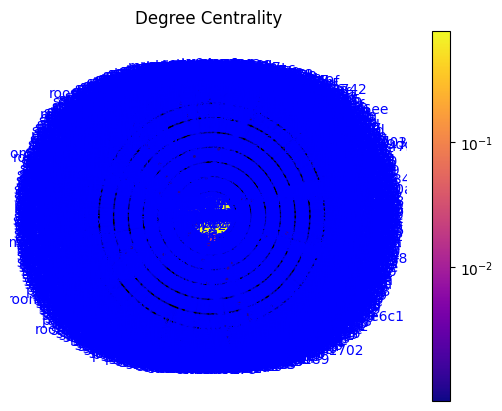

In [54]:
#* Draw the graph with node sizes proportional to their degree centrality.
draw(G, degree, 'Degree Centrality')

In [55]:
#* Sort the nodes by their degree centrality and print the sorted list.
x = degree
sorted_x = sorted(x.items(), key=lambda kv: kv[1], reverse=True)
for item in sorted_x:
    print(item)

('enroll', 0.7674509803921569)
('assignment', 0.1411764705882353)
('commented', 0.04823529411764706)
('register', 0.03176470588235294)
('grade', 0.03176470588235294)
('Bulletin Board', 0.027450980392156862)
('room_3814351ed6', 0.013333333333333332)
('room_45d026bf86', 0.012549019607843137)
('room_21ad9f34cb', 0.012549019607843137)
('room_6705f3c876', 0.011764705882352941)
('like', 0.011372549019607842)
('room_07a0beb394', 0.010980392156862745)
('room_43a3584398', 0.008235294117647058)
('room_a0dc6db183', 0.006666666666666666)
('happy', 0.006274509803921568)
('room_09e404cdb2', 0.005098039215686274)
('room_5912cff056', 0.005098039215686274)
('room_bbc5def6ee', 0.004313725490196078)
('faccdfbd', 0.003529411764705882)
('room_7eb680a0a1', 0.003529411764705882)
('fac1ed29', 0.003137254901960784)
('angry', 0.003137254901960784)
('room_5896e2263b', 0.0027450980392156863)
('room_7711bfe248', 0.0027450980392156863)
('room_a4ae8a2a9a', 0.0027450980392156863)
('facdbf59', 0.002352941176470588)
('

### Nodes with Top Degree Centrality Scores

In [56]:
# Write the sorted nodes and their degree centrality scores into a CSV file.
with open('degree_centrality_scores.csv', 'w', newline='') as csvfile:
    fieldnames = ['Node', 'Degree_Centrality']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for item in sorted_x:
        writer.writerow({'Node': item[0], 'Degree_Centrality': item[1]})

## Eigenvector Centrality 

In [57]:
#* Calculate the eigenvector centrality of the graph.
eigenvector = nx.eigenvector_centrality(G, max_iter=1000)

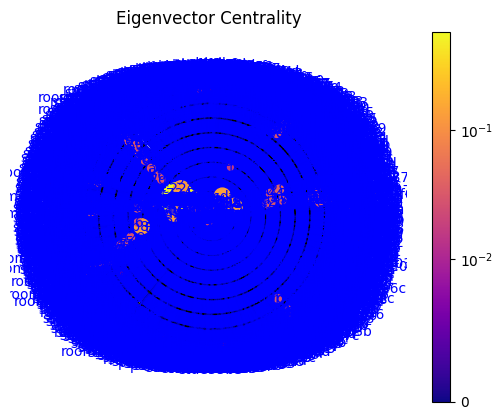

In [58]:
#* Draw the graph with node sizes proportional to their eigenvector centrality.
draw(G, eigenvector, 'Eigenvector Centrality')

In [59]:
#* Sort the nodes by their betweenness centrality and print the sorted list.
x = eigenvector
sorted_x = sorted(x.items(), key=lambda kv: kv[1], reverse=True)
for item in sorted_x:
    print(item)

('commented', 0.5768851504605221)
('room_3814351ed6', 0.19131498128501764)
('room_45d026bf86', 0.18072043967583504)
('room_6705f3c876', 0.17721954674639076)
('room_07a0beb394', 0.16170626256295217)
('assignment', 0.1611210704053407)
('fac1ed29', 0.13740121046680576)
('faccdfbd', 0.1354185152130701)
('fac9bb58', 0.13160873669575726)
('facdbf59', 0.12534942695423337)
('fac22eba', 0.12336673170049774)
('facb8f11', 0.11955695318318489)
('fac8a4fe', 0.11497008020704086)
('room_43a3584398', 0.10241298949632646)
('room_5912cff056', 0.09639584792764769)
('like', 0.09329784871122472)
('room_a0dc6db183', 0.08489576140182686)
('happy', 0.06755373303751858)
('room_7eb680a0a1', 0.06226674151005073)
('stua80b8', 0.04534346503268476)
('stu28fa6', 0.037830213020910476)
('stu2ebc5', 0.033594676748519535)
('stuedd41', 0.033594676748519535)
('stue740d', 0.033594676748519535)
('stu47581', 0.033594676748519535)
('stu8df36', 0.033594676748519535)
('stu6e59e', 0.033594676748519535)
('stu19742', 0.03359467674

### Nodes with Top Eigenvector Centrality Scores

In [60]:
# Write the sorted nodes and their degree centrality scores into a CSV file.
with open('eigenvector_centrality_scores.csv', 'w', newline='') as csvfile:
    fieldnames = ['Node', 'Influence_Centrality']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for item in sorted_x:
        writer.writerow({'Node': item[0], 'Influence_Centrality': item[1]})

## Betweenness Centrality 

In [61]:
#* Calculate the betweenness centrality of the graph.
betweenness = nx.betweenness_centrality(G)

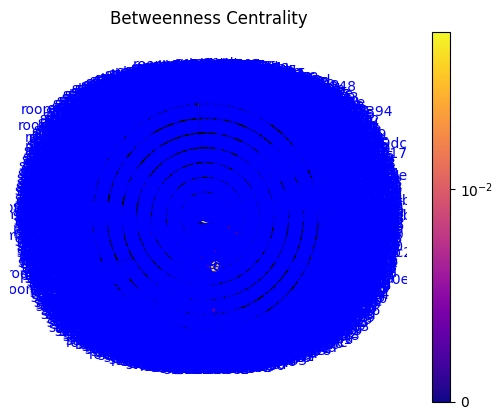

In [62]:
#* Draw the graph with node sizes proportional to their betweenness centrality.
draw(G, betweenness, 'Betweenness Centrality')

In [63]:
#* Sort the nodes by their betweenness centrality and print the sorted list.
x = nx.betweenness_centrality(G)
sorted_x = sorted(x.items(), key=lambda kv: kv[1], reverse=True)
for item in sorted_x:
    print(item)

('enroll', 0.06579682426102175)
('faccdfbd', 0.04457841293897012)
('commented', 0.04348102318043669)
('assignment', 0.01450063696356601)
('like', 0.008675953154712718)
('happy', 0.003793986900577115)
('fac1ed29', 0.0032888046215418247)
('stu28fa6', 0.003051851347049003)
('fac501f6', 0.002631856974653989)
('grade', 0.0018811743920946753)
('facdbf59', 0.001865139040450574)
('fac9bb58', 0.0016200121259072249)
('fac22eba', 0.0015305303647181626)
('facb8f11', 0.0014828140525727613)
('stuf8823', 0.0012281109462936597)
('register', 0.0011846236524683373)
('fac8a4fe', 0.00117971249767603)
('angry', 0.0011732027491070229)
('fac0d788', 0.0006493896106893131)
('faccf869', 0.00042555754290078305)
('surprise', 0.0003751967661853128)
('Bulletin Board', 0.0003673874414418574)
('collaborate', 0.0002930791775321349)
('parb5497', 0.0002379505483375514)
('parc319c', 0.0002379505483375514)
('par3d7be', 0.0002379505483375514)
('fac4546c', 0.00023214539926914808)
('stuc2b77', 0.00016968133026894967)
('stu1c

### Nodes with Top Betweenness Scores

In [64]:
# Write the sorted nodes and their degree centrality scores into a CSV file.
with open('betweenness_centrality_scores.csv', 'w', newline='') as csvfile:
    fieldnames = ['Node', 'Betweenness_Centrality']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for item in sorted_x:
        writer.writerow({'Node': item[0], 'Betweenness_Centrality': item[1]})